<a href="https://colab.research.google.com/github/davekumarr/EDV6/blob/main/NERHonours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install spaCy & pandas
!pip install -q "spacy>=3.5" pandas

# Download English spaCy model
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Install spaCy & pandas (quiet)
!pip install -q "spacy>=3.5" pandas

# If you need kagglehub package (you used it in snippet), install it.
# If kagglehub is already installed in your environment you can skip this install.
!pip install -q kagglehub

# Download spaCy small English model
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# This cell runs your exact kagglehub call and prints the returned path.
# It assumes kagglehub.dataset_download is available and returns a path (like /content/xxx).
import kagglehub
import os
import glob
import shutil

# call the downloader
path = kagglehub.dataset_download("azmayensabil/doctor-patient-conversation-large")
print("Path to dataset files:", path)

# if it's an archive, try to unzip it (support .zip)
if os.path.isfile(path) and path.lower().endswith(".zip"):
    print("Unzipping", path)
    shutil.unpack_archive(path, "/content/dataset_extracted")
    base_dir = "/content/dataset_extracted"
else:
    # if path is a folder, use it; otherwise try to search common locations
    if os.path.isdir(path):
        base_dir = path
    else:
        # try patterns under current working dir
        cand = glob.glob("/content/**/doctor-patient-conversation-large", recursive=True)
        base_dir = cand[0] if cand else "/content"
print("Using base directory:", base_dir)

# list first 20 files for your inspection
for i, f in enumerate(glob.glob(os.path.join(base_dir, "**/*"), recursive=True)[:40]):
    print(i+1, f)


100%|██████████| 786k/786k [00:00<00:00, 15.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1
Using base directory: /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1
1 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/RES0063.txt
2 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/RES0077.txt
3 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/RES0035.txt
4 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/MSK0044.txt
5 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/MSK0026.txt
6 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/RES0184.txt
7 /root/.cache/kagglehub/datasets/azmayensabil/doctor-patient-conversation-large/versions/1/RES0028.txt
8 /root/.cache/kagglehub/da

In [ ]:
# Runs your downloader and prints the returned path. Adjust if kagglehub requires auth.
import kagglehub, os, glob, shutil
from pathlib import Path

print("Calling kagglehub.dataset_download(...) ...")
path = kagglehub.dataset_download("azmayensabil/doctor-patient-conversation-large")
print("Returned path:", path)

# Normalize to Path
p = Path(path) if path else None

# Prepare extraction target
EXTRACT_DIR = Path("/content/dataset_extracted")
EXTRACT_DIR.mkdir(parents=True, exist_ok=True)

base_dir = None
if p and p.exists():
    if p.is_file():
        # if zip or tar, extract
        lname = p.name.lower()
        if lname.endswith(".zip"):
            print("Unzipping zip archive to", EXTRACT_DIR)
            shutil.unpack_archive(str(p), str(EXTRACT_DIR))
            base_dir = str(EXTRACT_DIR)
        elif lname.endswith((".tar.gz", ".tgz", ".tar")):
            print("Untarring archive to", EXTRACT_DIR)
            shutil.unpack_archive(str(p), str(EXTRACT_DIR))
            base_dir = str(EXTRACT_DIR)
        else:
            # If it's a single file (maybe a txt), put it under extract dir
            print("Single file returned; copying into", EXTRACT_DIR)
            shutil.copy2(str(p), EXTRACT_DIR)
            base_dir = str(EXTRACT_DIR)
    elif p.is_dir():
        print("Downloader returned a directory:", p)
        base_dir = str(p)
else:
    # fallback: search /content for likely dataset dirs
    cand = glob.glob("/content/**/doctor-patient-conversation-large", recursive=True)
    if cand:
        base_dir = cand[0]
    else:
        # attempt common extraction locations
        cand2 = glob.glob("/content/**/azmayensabil*doctor*", recursive=True)
        base_dir = cand2[0] if cand2 else "/content"

print("Using base directory:", base_dir)

# show a quick listing (first 100 entries)
import itertools
items = list(itertools.islice(glob.glob(os.path.join(base_dir, "**", "*"), recursive=True), 200))
print("Sample files under base_dir:")
for it in items[:80]:
    print(" ", it)


Calling kagglehub.dataset_download(...) ...
Using Colab cache for faster access to the 'doctor-patient-conversation-large' dataset.
Returned path: /kaggle/input/doctor-patient-conversation-large
Downloader returned a directory: /kaggle/input/doctor-patient-conversation-large
Using base directory: /kaggle/input/doctor-patient-conversation-large
Sample files under base_dir:
  /kaggle/input/doctor-patient-conversation-large/RES0043.txt
  /kaggle/input/doctor-patient-conversation-large/CAR0001.txt
  /kaggle/input/doctor-patient-conversation-large/RES0046.txt
  /kaggle/input/doctor-patient-conversation-large/RES0141.txt
  /kaggle/input/doctor-patient-conversation-large/GAS0004.txt
  /kaggle/input/doctor-patient-conversation-large/RES0193.txt
  /kaggle/input/doctor-patient-conversation-large/RES0109.txt
  /kaggle/input/doctor-patient-conversation-large/RES0201.txt
  /kaggle/input/doctor-patient-conversation-large/RES0081.txt
  /kaggle/input/doctor-patient-conversation-large/RES0130.txt
  /ka

In [ ]:
import glob, os, pandas as pd
BASE_DIR = "/content/dataset_extracted"  # default used above; if base_dir printed different, replace this with that printed path
# If downloader printed a different base_dir, edit this variable accordingly.

# Try to detect the actual base dir printed earlier; if the printed path exists, use it:
# (This tries to avoid manual edits; if it fails, manually set BASE_DIR to the printed path)
import json
from pathlib import Path
possible = ["/content/dataset_extracted", "/content/doctor-patient-conversation-large", "/content"]
for cand in possible:
    if Path(cand).exists() and any(Path(cand).rglob("*.txt")):
        BASE_DIR = cand
        break

txt_files = sorted(glob.glob(os.path.join(BASE_DIR, "**", "*.txt"), recursive=True))
print("Found", len(txt_files), "txt files. Example (first 8):")
print(txt_files[:8])

if len(txt_files) == 0:
    raise SystemExit(f"No .txt files found under {BASE_DIR}. Please check the 'base directory' printed earlier and set BASE_DIR to the correct path.")

# OPTION A: one document per file (recommended if files are conversations)
rows = []
for fp in txt_files:
    fname = os.path.relpath(fp, BASE_DIR)
    try:
        with open(fp, "r", encoding="utf8", errors="ignore") as f:
            text = f.read().strip()
    except Exception as e:
        print("Failed reading", fp, ":", e)
        text = ""
    if text:
        rows.append({"file": fname, "text": text})

CSV_PATH = "/content/all_conversations.csv"
df = pd.DataFrame(rows)
df.to_csv(CSV_PATH, index=False)
print("✅ Wrote", CSV_PATH, "with", len(df), "documents (one per file).")
display(df.head(5))


Found 0 txt files. Example (first 8):
[]


SystemExit: No .txt files found under /content/dataset_extracted. Please check the 'base directory' printed earlier and set BASE_DIR to the correct path.

In [ ]:
# ✅ Correct Colab shell cell
!echo "Searching /content for .txt, .zip, .json, .csv, tar archives..."
!find /content -maxdepth 4 -type f \( -iname "*.txt" -o -iname "*.zip" -o -iname "*.json" -o -iname "*.csv" -o -iname "*.tar.gz" -o -iname "*.tgz" \) -print | sed -n '1,200p'
!echo "---- done ----"


Searching /content for .txt, .zip, .json, .csv, tar archives...
/content/.config/.last_update_check.json
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
---- done ----


In [ ]:
# Run this as a Python cell in Colab.
# It will call kagglehub.dataset_download(...), extract archives if needed,
# then search and print any .txt/.csv/.json files found so you can proceed.

import kagglehub, glob, os, shutil
from pathlib import Path

print("Calling kagglehub.dataset_download(...) ...")
path = kagglehub.dataset_download("azmayensabil/doctor-patient-conversation-large")
print("kagglehub returned:", path)

p = Path(path) if path else None
EXTRACT_DIR = Path("/content/dataset_extracted")
EXTRACT_DIR.mkdir(parents=True, exist_ok=True)

base_dir = None
try:
    if p and p.exists():
        if p.is_file():
            name = p.name.lower()
            if name.endswith(".zip") or name.endswith(".tar.gz") or name.endswith(".tgz") or name.endswith(".tar"):
                print("Archive detected -> extracting to", EXTRACT_DIR)
                shutil.unpack_archive(str(p), str(EXTRACT_DIR))
                base_dir = str(EXTRACT_DIR)
            else:
                # single file (txt/json/csv) - copy into extract dir
                shutil.copy2(str(p), EXTRACT_DIR)
                base_dir = str(EXTRACT_DIR)
                print("Copied single file to", base_dir)
        elif p.is_dir():
            base_dir = str(p)
            print("Downloader returned directory:", base_dir)
    else:
        # fallback: search /content for folders that look like dataset
        candidates = glob.glob("/content/**/doctor-patient-conversation-large*", recursive=True)
        candidates += glob.glob("/content/**/azmayensabil*", recursive=True)
        candidates = [c for c in candidates if os.path.exists(c)]
        if candidates:
            base_dir = candidates[0]
            print("Found candidate folder:", base_dir)
        else:
            base_dir = str(EXTRACT_DIR)
            print("No returned path found. Using", base_dir, "as extraction/search dir (may be empty).")
except Exception as e:
    print("Error handling returned path:", e)
    base_dir = str(EXTRACT_DIR)

# Now list relevant files under base_dir
print("\nSearching for .txt/.csv/.json files under:", base_dir)
found = []
for ext in ("*.txt","*.csv","*.json"):
    found.extend(glob.glob(os.path.join(base_dir, "**", ext), recursive=True))

if not found:
    print("No .txt/.csv/.json files found under", base_dir)
    print("Full top-level listing of /content (for debugging):")
    for p in sorted(glob.glob("/content/*")):
        print(" ", p)
else:
    print("Found files (first 200):")
    for f in found[:200]:
        print(" ", f)

# Print a short preview of the first text file (if any)
if found:
    sample = found[0]
    print("\nPreview of:", sample)
    try:
        with open(sample, "r", encoding="utf8", errors="ignore") as fh:
            for i, line in enumerate(fh):
                if i>=20: break
                print(line.rstrip())
    except Exception as e:
        print("Could not preview file:", e)

# Print instruction for the next step
if found:
    print("\nIf you see .txt files above, copy one full path and paste it here.")
else:
    print("\nIf nothing was found, either (A) mount your Google Drive and use the Drive path, or (B) give me the exact output shown above and I'll tell you the exact next command.")


Calling kagglehub.dataset_download(...) ...
Using Colab cache for faster access to the 'doctor-patient-conversation-large' dataset.
kagglehub returned: /kaggle/input/doctor-patient-conversation-large
Downloader returned directory: /kaggle/input/doctor-patient-conversation-large

Searching for .txt/.csv/.json files under: /kaggle/input/doctor-patient-conversation-large
Found files (first 200):
  /kaggle/input/doctor-patient-conversation-large/RES0043.txt
  /kaggle/input/doctor-patient-conversation-large/CAR0001.txt
  /kaggle/input/doctor-patient-conversation-large/RES0046.txt
  /kaggle/input/doctor-patient-conversation-large/RES0141.txt
  /kaggle/input/doctor-patient-conversation-large/GAS0004.txt
  /kaggle/input/doctor-patient-conversation-large/RES0193.txt
  /kaggle/input/doctor-patient-conversation-large/RES0109.txt
  /kaggle/input/doctor-patient-conversation-large/RES0201.txt
  /kaggle/input/doctor-patient-conversation-large/RES0081.txt
  /kaggle/input/doctor-patient-conversation-la

In [ ]:
import glob, os, pandas as pd

# ✅ Path confirmed from your output
BASE_DIR = "/kaggle/input/doctor-patient-conversation-large"

# Find all .txt files
txt_files = sorted(glob.glob(os.path.join(BASE_DIR, "*.txt")))
print("Found", len(txt_files), "txt files.")

rows = []
for fp in txt_files:
    fname = os.path.basename(fp)
    with open(fp, "r", encoding="utf8", errors="ignore") as f:
        text = f.read().strip()
        if text:
            rows.append({"file": fname, "text": text})

df = pd.DataFrame(rows)
CSV_PATH = "/content/all_conversations.csv"
df.to_csv(CSV_PATH, index=False)
print(f"✅ Combined into {CSV_PATH} with {len(df)} conversations")
df.head(3)


Found 272 txt files.
✅ Combined into /content/all_conversations.csv with 272 conversations


,file,text
0,CAR0001.txt,"D: What brought you in today?\n\nP: Sure, I'm ..."
1,CAR0002.txt,"D: What brings you in here today?\n\nP: Yeah, ..."
2,CAR0003.txt,"D: What brings you in here today?\n\nP: Yeah, ..."


In [ ]:
import json

patterns = [
    {"label":"SYMPTOM","pattern":"cough"},
    {"label":"SYMPTOM","pattern":"fever"},
    {"label":"SYMPTOM","pattern":"headache"},
    {"label":"SYMPTOM","pattern":"chest pain"},
    {"label":"DISEASE","pattern":"asthma"},
    {"label":"DISEASE","pattern":"covid"},
    {"label":"DISEASE","pattern":"diabetes"},
    {"label":"MEDICATION","pattern":"ibuprofen"},
    {"label":"MEDICATION","pattern":"paracetamol"},
    {"label":"TEST","pattern":"blood test"},
]

with open("patterns.jsonl", "w", encoding="utf8") as f:
    for p in patterns:
        f.write(json.dumps(p) + "\n")

print("✅ patterns.jsonl created with", len(patterns), "patterns")
!head -n 20 patterns.jsonl


✅ patterns.jsonl created with 10 patterns
{"label": "SYMPTOM", "pattern": "cough"}
{"label": "SYMPTOM", "pattern": "fever"}
{"label": "SYMPTOM", "pattern": "headache"}
{"label": "SYMPTOM", "pattern": "chest pain"}
{"label": "DISEASE", "pattern": "asthma"}
{"label": "DISEASE", "pattern": "covid"}
{"label": "DISEASE", "pattern": "diabetes"}
{"label": "MEDICATION", "pattern": "ibuprofen"}
{"label": "MEDICATION", "pattern": "paracetamol"}
{"label": "TEST", "pattern": "blood test"}


In [ ]:
!pip install -q spacy pandas
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy, pandas as pd, json
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_sm")

# Add custom EntityRuler
if "entity_ruler" in nlp.pipe_names:
    nlp.remove_pipe("entity_ruler")
ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.from_disk("patterns.jsonl")

# Read dataset
df = pd.read_csv("/content/all_conversations.csv")

docs = []
records = []

for i, row in df.iterrows():
    doc = nlp(row["text"])
    docs.append(doc)
    ents = [{"text": e.text, "label": e.label_} for e in doc.ents]
    records.append({
        "file": row["file"],
        "entities": json.dumps(ents, ensure_ascii=False)
    })

# Save outputs
out_csv = "/content/ner_output.csv"
pd.DataFrame(records).to_csv(out_csv, index=False)
print("✅ NER results saved to:", out_csv)


✅ NER results saved to: /content/ner_output.csv


In [ ]:
import pandas as pd, json

df = pd.read_csv("/content/ner_output.csv")
print("✅ Total processed:", len(df))
display(df.head(5))

# Show first few entities in readable format
for i in range(min(3, len(df))):
    print(f"\n🩺 FILE: {df.loc[i,'file']}")
    ents = json.loads(df.loc[i,"entities"])
    for e in ents:
        print(f"   🔹 {e['text']} → {e['label']}")


✅ Total processed: 272


,file,entities
0,CAR0001.txt,"[{""text"": ""today"", ""label"": ""DATE""}, {""text"": ..."
1,CAR0002.txt,"[{""text"": ""today"", ""label"": ""DATE""}, {""text"": ..."
2,CAR0003.txt,"[{""text"": ""today"", ""label"": ""DATE""}, {""text"": ..."
3,CAR0004.txt,"[{""text"": ""today"", ""label"": ""DATE""}, {""text"": ..."
4,CAR0005.txt,"[{""text"": ""chest pain"", ""label"": ""SYMPTOM""}, {..."



🩺 FILE: CAR0001.txt
   🔹 today → DATE
   🔹 chest pain → SYMPTOM
   🔹 chest pain → SYMPTOM
   🔹 last night → TIME
   🔹 last night → TIME
   🔹 a couple of hours → TIME
   🔹 8 → CARDINAL
   🔹 last night → TIME
   🔹 1 to 10 → CARDINAL
   🔹 10 → CARDINAL
   🔹 seven → CARDINAL
   🔹 eight → CARDINAL
   🔹 cough → SYMPTOM
   🔹 the past 10 to 15 years → DATE
   🔹 marijuana → PERSON
   🔹 about 5 → CARDINAL
   🔹 meth → GPE
   🔹 each week → DATE
   🔹 one → CARDINAL
   🔹 two → CARDINAL
   🔹 about 10 → CARDINAL
   🔹 a week → DATE
   🔹 about half an hour → TIME
   🔹 45 → DATE
   🔹 today → DATE

🩺 FILE: CAR0002.txt
   🔹 today → DATE
   🔹 just 30 minutes ago → TIME
   🔹 the last half an hour → DATE
   🔹 zero → CARDINAL
   🔹 10 → CARDINAL
   🔹 zero → CARDINAL
   🔹 10 → CARDINAL
   🔹 seven → CARDINAL
   🔹 Seven → CARDINAL
   🔹 chest pain → SYMPTOM
   🔹 cough → SYMPTOM
   🔹 yesterday → DATE
   🔹 yesterday → DATE
   🔹 half an hour ago → TIME
   🔹 today → DATE
   🔹 38 degrees → QUANTITY
   🔹 cough → SYMPTOM

In [ ]:
from spacy import displacy

doc = docs[0]  # visualize the first one
displacy.render(doc, style="ent", jupyter=True)


In [ ]:
import re
text = "The patient has a high fever and cough, given paracetamol for 5 days."

symptoms = re.findall(r"\b(fever|cough|pain)\b", text, flags=re.I)
print("Symptoms:", symptoms)


Symptoms: ['fever', 'cough']


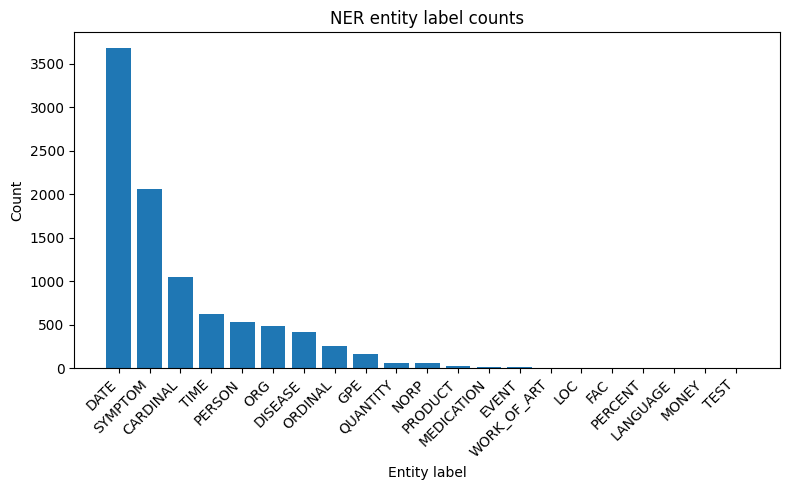

In [ ]:
# Bar chart of entity label counts
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("/content/ner_output.csv")
label_counts = Counter()
for row in df['entities'].astype(str):
    if not row or row == '[]': continue
    ents = json.loads(row)
    for e in ents:
        label_counts[e['label']] += 1

labels, counts = zip(*label_counts.most_common()) if label_counts else ([],[])
plt.figure(figsize=(8,5))
plt.bar(labels, counts)
plt.xlabel("Entity label")
plt.ylabel("Count")
plt.title("NER entity label counts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


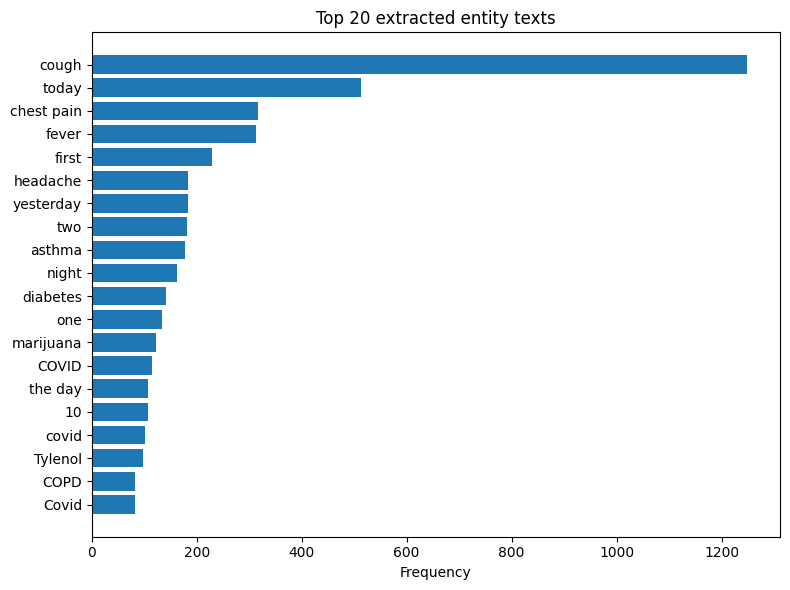

In [ ]:
# Horizontal bar chart of top N entity texts (surface forms)
import pandas as pd, json
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("/content/ner_output.csv")
ent_counter = Counter()
for row in df['entities'].astype(str):
    if not row or row == '[]': continue
    ents = json.loads(row)
    for e in ents:
        ent_counter[e['text'].strip()] += 1

TOP_N = 20
top = ent_counter.most_common(TOP_N)
if top:
    names, vals = zip(*top)
    plt.figure(figsize=(8,6))
    plt.barh(range(len(names)), vals)
    plt.yticks(range(len(names)), names)
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {TOP_N} extracted entity texts")
    plt.tight_layout()
    plt.show()
else:
    print("No entities found to plot.")


Nodes in graph: 40 Edges: 773


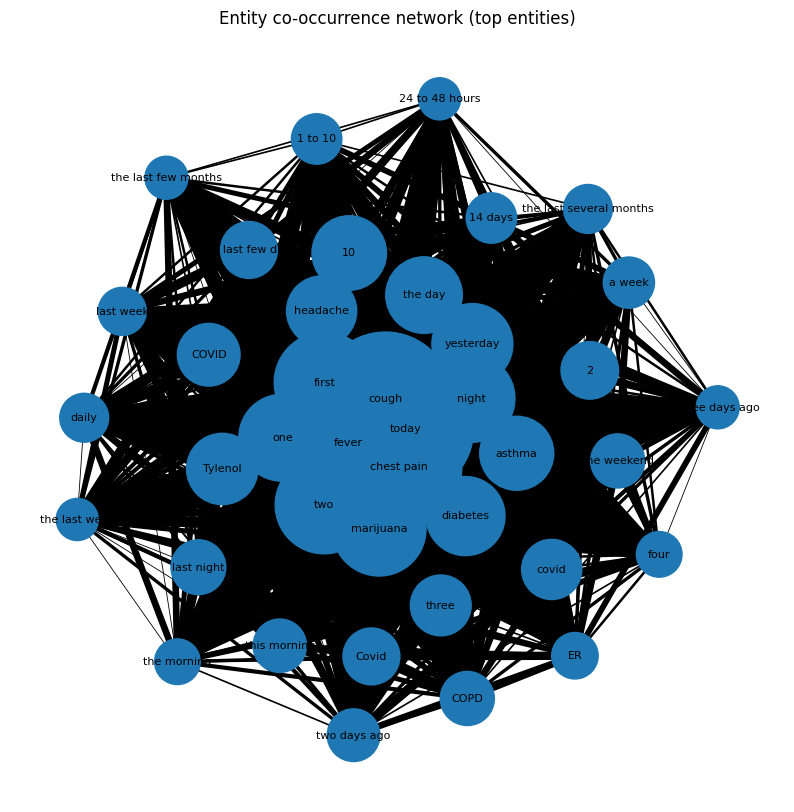

In [ ]:
# Build a co-occurrence network of entity texts that appear in the same document
import pandas as pd, json
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

df = pd.read_csv("/content/ner_output.csv")
co_counts = Counter()
node_counts = Counter()

for row in df['entities'].astype(str):
    if not row or row == '[]': continue
    ents = json.loads(row)
    texts = [e['text'].strip() for e in ents]
    unique = list(dict.fromkeys(texts))  # preserve order but unique
    for t in unique:
        node_counts[t] += 1
    # count co-occurrence pairs
    for a, b in combinations(sorted(unique), 2):
        co_counts[(a,b)] += 1

# Take top nodes and edges for readability
TOP_NODES = 40
top_nodes = set([n for n,_ in node_counts.most_common(TOP_NODES)])
G = nx.Graph()
# add nodes with weight attribute
for n, w in node_counts.items():
    if n in top_nodes:
        G.add_node(n, weight=w)

# add edges with weight (only if both nodes in top_nodes)
for (a,b), w in co_counts.items():
    if a in top_nodes and b in top_nodes and w>0:
        G.add_edge(a, b, weight=w)

print("Nodes in graph:", len(G.nodes()), "Edges:", len(G.edges()))

if len(G.nodes())==0:
    print("No co-occurrence graph to display (not enough entity overlap).")
else:
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    # node sizes proportional to frequency
    sizes = [G.nodes[n]['weight']*40 for n in G.nodes()]
    # edge widths proportional to co-occurrence count
    widths = [G[u][v]['weight'] for u,v in G.edges()]
    nx.draw_networkx_nodes(G, pos, node_size=sizes)
    nx.draw_networkx_edges(G, pos, width=[max(0.5, w*0.6) for w in widths])
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("Entity co-occurrence network (top entities)")
    plt.axis('off')
    plt.show()
